# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [1]:
def rng(m=2**32, a=3333333333, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

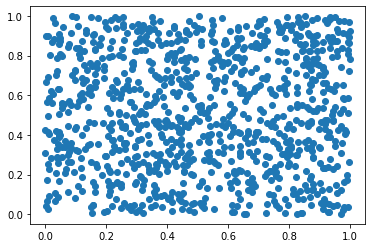

In [2]:
import matplotlib.pyplot as plt
def rng(m=2**32, a=19870984121829021, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
r = [rng() for i in range(1000)]
plt.scatter(r[1:], r[:-1])
plt.show()

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [3]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

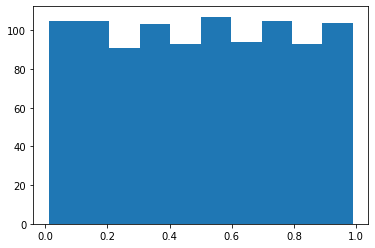

In [4]:
import matplotlib.pyplot as plt
plt.hist(random)
plt.show()

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

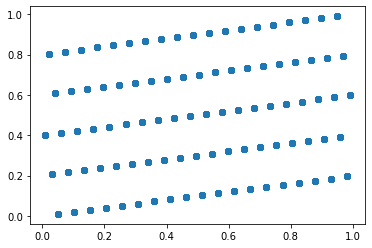

In [5]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

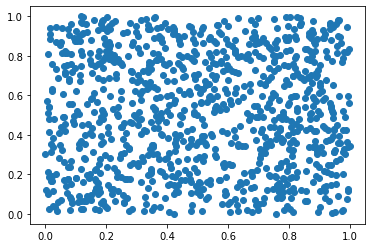

In [6]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

Сюжет про динамические системы и переход к хаосу https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [7]:
import numpy as np
from scipy.ndimage.interpolation import shift
import time

normed weights: [0.05973121 0.14932802 0.08312593 0.11946242 0.15430562 0.26879044
 0.05525137 0.0099552  0.00049776 0.09955202]
time of generation: 0.0027231


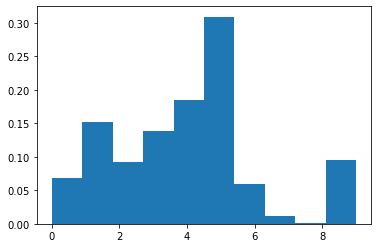

In [8]:
W = np.asarray([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
W_0_1 = np.asarray([np.sum(W[:i + 1]) / np.sum(W)  for i in range(10)])
print('normed weights:', W / W.sum())
def digit_w_1(W):
  random_num = rng()
  for i in range(10):
    if (random_num < W[i]):
      return i
start = time.perf_counter_ns()
random_set = [digit_w_1(W_0_1) for i in range(1000)]
print("time of generation:", (time.perf_counter_ns() - start) / 10. ** 9)
plt.hist(random_set, density=True)
# plt.xticks(np.arange(10))
plt.show()

In [9]:
W = np.sort(np.asarray([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]))
W_0_1 = np.asarray([np.sum(W[:i + 1]) / np.sum(W)  for i in range(10)])
start = time.perf_counter_ns()
random_set = [digit_w_1(W_0_1) for i in range(1000)]
print("time of generation:", (time.perf_counter_ns() - start) / 10. ** 9)

time of generation: 0.0033874


При такой реализации время не отличается

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

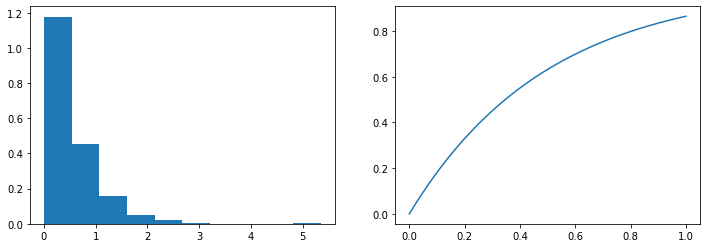

In [10]:
l = 2
def exp(x, l = l):
  return 1 - np.exp(-l * x)
def rev_exp(x, l=l):
  return - np.log(1 - x) / l
def exp_distr():
  return rev_exp(rng())
random_set = [exp_distr() for i in range(1000)]
_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(random_set, density=True)
x = np.linspace(0, 1, 1000)
ax[1].plot(x, exp(x))
plt.show()

In [11]:
print(rev_exp(exp(19.)))

inf


<ipython-input-10-bf5527145ff5>:5: RuntimeWarning: divide by zero encountered in log
  return - np.log(1 - x) / l


### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

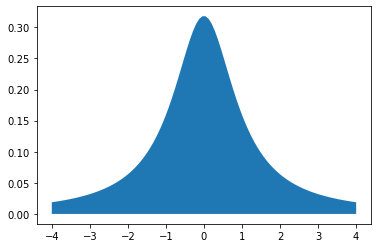

In [12]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

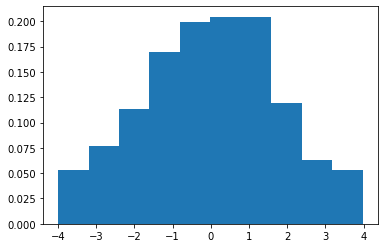

In [13]:
def uniform_4__0_3():
  return rng() * 8 - 4, rng() * 0.3
def check_cauchy(x):
  return 1. / (1 + x[0] ** 2) >= x[1]
def sample_cauchy():
  while True:
    rand_pair = uniform_4__0_3()
    if check_cauchy(rand_pair):
      return float(rand_pair[0])
random_set = [sample_cauchy() for i in range(1000)]
plt.hist(random_set, density=True)
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

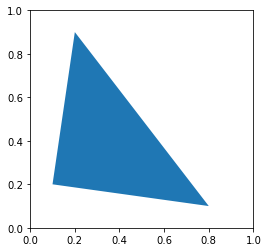

In [14]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
_, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

(0.0, 1.0)

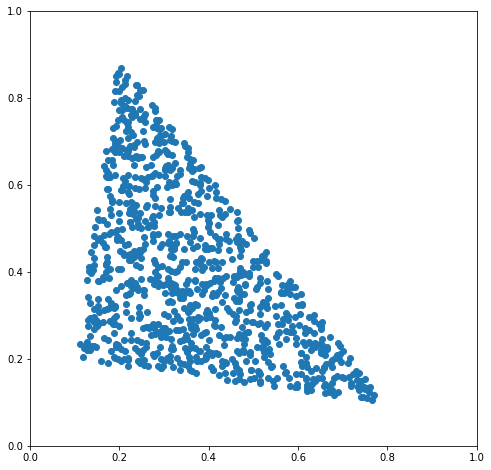

In [15]:
sin = 1 / 50 ** 0.5
cos = (1 - sin ** 2) ** 0.5
def rotation(x, y):
  return cos * x + sin * y, - sin * x + cos * y
def lin_transform(point):
  return 0.1 + point[0] * 0.7, 0.2 + point[1] * 0.7
def uniform_1__1_x_more():
  x, y = rng() , rng()
  if 1 - x > y:
    return lin_transform(rotation(x, y))
  else:
    return lin_transform(rotation(1 - x, 1 - y))
random_set = np.asarray([uniform_1__1_x_more() for i in range(1000)])
_, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(random_set[:, 0], random_set[:, 1])
plt.xlim(0, 1)
plt.ylim(0, 1)

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

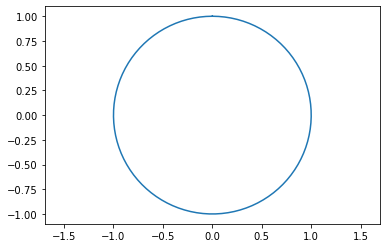

In [16]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

(-1.2, 1.2)

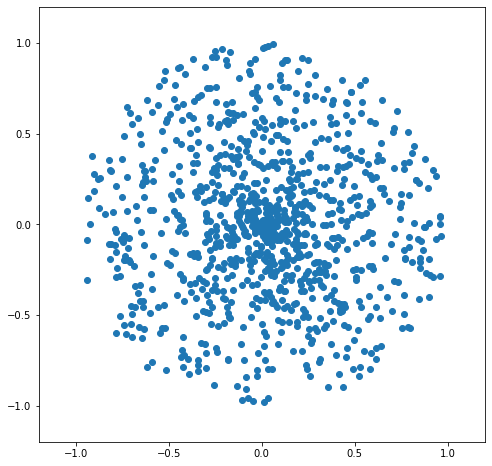

In [17]:
def circle():
  angle = rng() * 2 * np.pi
  radius = rng()
  return radius * np.cos(angle), radius * np.sin(angle)
random_set = np.asarray([circle() for i in range(1000)])
_, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(random_set[:, 0], random_set[:, 1])
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

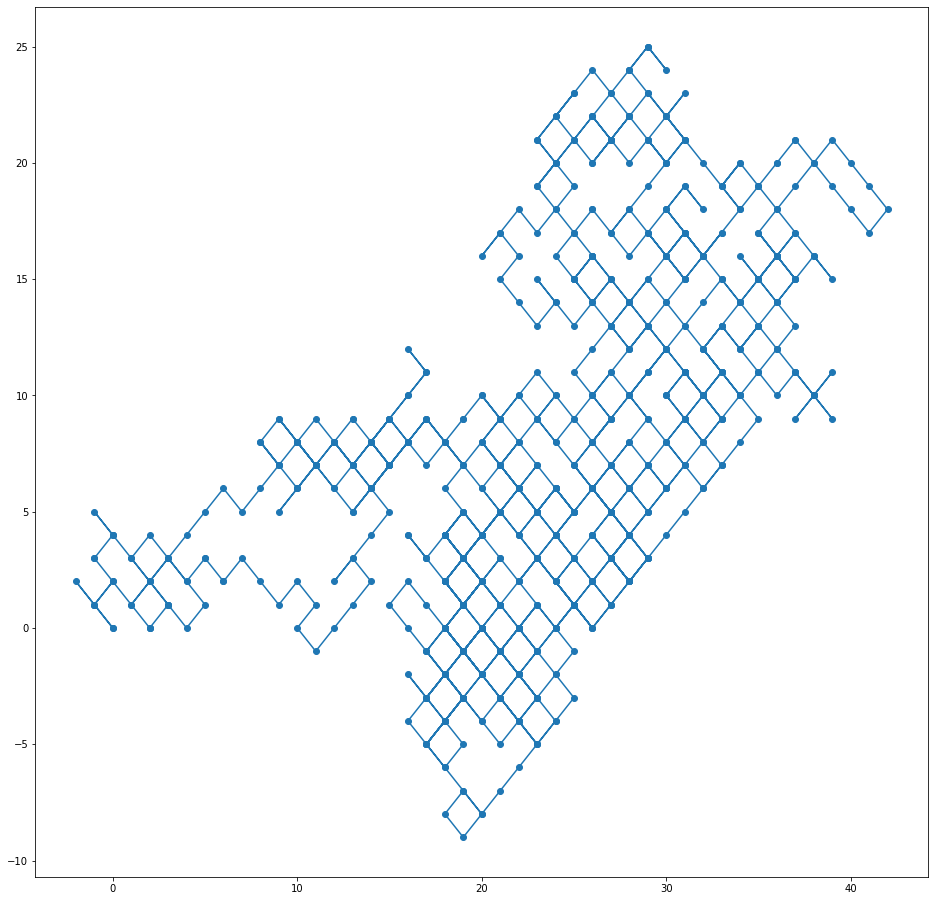

In [18]:
start = np.asarray((0, 0))
cur = np.copy(start)
path = [start]
while True:
  step = np.asarray((np.random.random() > 0.5, np.random.random() > 0.5)) * 2 - 1
  if(True not in (cur > 100)):
    _path = path
    cur += step
    path += [np.copy(cur)]
    if (cur == start).all():
      break
path = np.asarray(path)
_, ax = plt.subplots(1, 1, figsize=(16, 16))
plt.plot(path[:,0], path[:,1], marker = 'o')
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

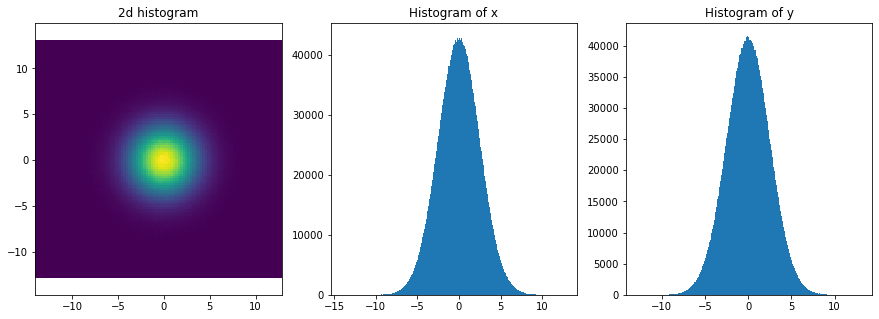

In [19]:
n = 10000000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(2 * np.pi) * np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=100)
ax[0].axis('equal')
ax[1].hist(x, bins=1000)
ax[2].hist(y, bins=1000)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

0.010540284546891994 0.9999444496579151 1.0
0.7111446623849832 0.703045709155065 1.0
-0.869648088434597 0.49367216073225284 0.9999999999999998
-0.638392532685562 -0.7697109679687003 0.9999999999999998
0.9292092382245276 -0.3695540442184244 1.0000000000000002
0.8037598596552338 0.5949538536785848 1.0
0.6108718172916149 -0.7917295136843389 0.9999999999999999
-0.9836009230490182 -0.1803585988444105 0.9999999999999998
-0.9658053178863341 -0.25926837050144996 0.9999999999999999
0.2730763275710312 0.9619923696788447 1.0000000000000002


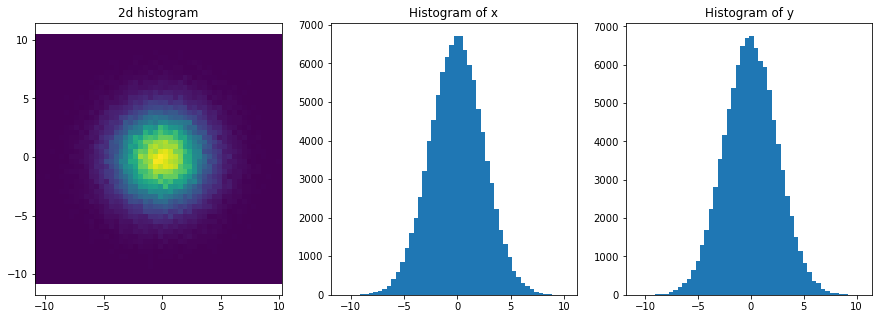

In [20]:
n = 100000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(2 * np.pi) * np.sqrt(-2 * np.log(u1))
x_angle, y_angle = [], []
# можно в принципе сделать без цикла
for i in range(n):
  _x_angle, _y_angle = rng() * 2 - 1, rng() * 2 - 1
  while _x_angle ** 2 + _y_angle ** 2 > 1:
    _x_angle, _y_angle = rng() * 2 - 1, rng() * 2 - 1
  x_angle += [_x_angle]
  y_angle += [_y_angle]
x_angle, y_angle = np.array(x_angle), np.array(y_angle)
r_tmp = np.sqrt(x_angle ** 2 + y_angle ** 2)
x_angle, y_angle = x_angle / r_tmp, y_angle / r_tmp
for i in range(10):
  print(x_angle[i], y_angle[i], x_angle[i] ** 2 + y_angle[i] ** 2)
x = r * x_angle
y = r * y_angle
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=50)
ax[0].axis('equal')
ax[1].hist(x, bins=50)
ax[2].hist(y, bins=50)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

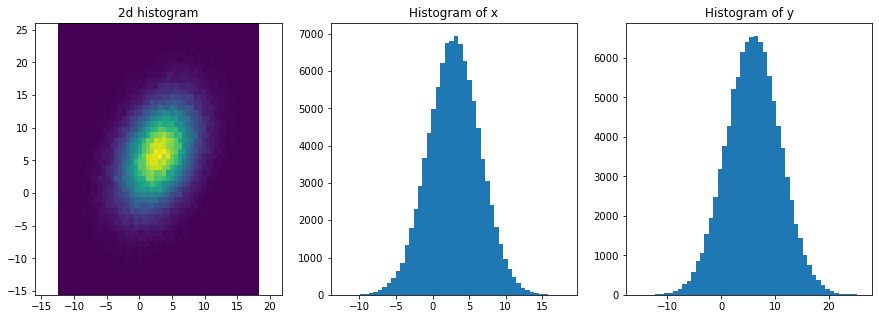

In [21]:
S = np.array(((2, 1.), (1, 4)))
V, L, _ = np.linalg.svd(S)
A = V @ np.diag(np.sqrt(L))
m = 3, 6
Points = np.vstack((x, y))
transformed_points = np.transpose(A @ Points) + m
xt, yt = transformed_points[:, 0], transformed_points[:, 1]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(xt, yt, bins=50)
ax[0].axis('equal')
ax[1].hist(xt, bins=50)
ax[2].hist(yt, bins=50)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

### Задача
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [22]:
n = 10
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
V, L, _ = np.linalg.svd(B)
A = V @ np.diag(np.sqrt(L))
print('error of square root: %.2e' % (B - A @ A.T).max())
x = A @ np.random.randn(B.shape[0], n)
for i in range(7):
  x = A @ np.random.randn(B.shape[0], n)
  print('error of covarience for n = 10 ** %d: %.2e' % (len(str(n)) - 1, (np.cov(x) - B).max()))
  n *= 10

error of square root: 3.55e-15
error of covarience for n = 10 ** 1: 2.61e+00
error of covarience for n = 10 ** 2: 1.08e+00
error of covarience for n = 10 ** 3: 2.29e-01
error of covarience for n = 10 ** 4: 9.51e-02
error of covarience for n = 10 ** 5: 3.56e-02
error of covarience for n = 10 ** 6: 8.86e-03
error of covarience for n = 10 ** 7: 3.51e-03


### Задача
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


In [31]:
N, N_s = 10, 0
while True:
  for i in range(N):
    x, y = rng(), rng()
    if x ** 2 + y ** 2 < 1:
      N_s += 1
  error = np.abs(N_s / N * 2 - np.pi)
  print('error for N = %d is %f' % (N, error))
  if error < 0.01:
    break
  else:
    N *= 2

error for N = 10 is 1.941593
error for N = 20 is 0.841593
error for N = 40 is 0.241593
error for N = 80 is 0.091593
error for N = 160 is 0.041593
error for N = 320 is 0.110343
error for N = 640 is 0.079093
error for N = 1280 is 0.072843
error for N = 2560 is 0.032999
error for N = 5120 is 0.005655


Достоверность ~ 1 - 1 / sqrt(N)

### Задача

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [32]:
n = 100
N = 10 ** 1
uniq = []
for i in range(6):
  # максимальное число подмножеств в разбиении равно числу элементов
  for i in range(N):
    uniq += [np.shape(np.unique((np.random.random(n) * n).astype('int32')))[0]]
  print('for number of experiments 10 ** %d, expectation = %f' % (len(str(N)) - 1, np.mean(uniq)))
  N *= 10

for number of experiments 10 ** 1, expectation = 63.600000
for number of experiments 10 ** 2, expectation = 63.309091
for number of experiments 10 ** 3, expectation = 63.273874
for number of experiments 10 ** 4, expectation = 63.409541
for number of experiments 10 ** 5, expectation = 63.396607
for number of experiments 10 ** 6, expectation = 63.399455
